In [6]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
from matplotlib import pyplot
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Root directory of the project
ROOT_DIR = os.path.abspath(".")

import utils
import visualize
from visualize import display_images
import model as modellib
from config import Config
from model import MaskRCNN

%matplotlib inline

ImportError: cannot import name 'ft2font' from 'matplotlib' (C:\Users\4euge\anaconda3\envs\tf\lib\site-packages\matplotlib\__init__.py)

In [2]:
import csv
import dataset

# Load class map - these tables map the original TACO classes to your desired class system
# and allow you to discard classes that you don't want to include.
class_map = {}
with open("./taco_config/map_10.csv") as csvfile:
    reader = csv.reader(csvfile)
    class_map = {row[0]:row[1] for row in reader}

# Load full dataset or a subset
TACO_DIR = "../data"
round = None # Split number: If None, loads full dataset else if int > 0 selects split no 
subset = "train" # Used only when round !=None, Options: ('train','val','test') to select respective subset
dataset = dataset.Taco()
taco = dataset.load_taco(TACO_DIR, round, subset, class_map=class_map, return_taco=True)

# Must call before using the dataset
dataset.prepare()

print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

creating index...
index created!
Number of images used: 1500
Class Count: 11
  0. BG                                                
  1. Bottle                                            
  2. Bottle cap                                        
  3. Can                                               
  4. Cigarette                                         
  5. Cup                                               
  6. Lid                                               
  7. Other                                             
  8. Plastic bag + wrapper                             
  9. Pop tab                                           
 10. Straw                                             


In [5]:
# draw an image with detected objects
def draw_image_with_boxes(filename, boxes_list):
     # load the image
     data = pyplot.imread(filename)
     # plot the image
     pyplot.imshow(data)
     # get the context for drawing boxes
     ax = pyplot.gca()
     # plot each box
     for box in boxes_list:
          # get coordinates
          y1, x1, y2, x2 = box
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
     # show the plot
     pyplot.show()
 
class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 10 







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


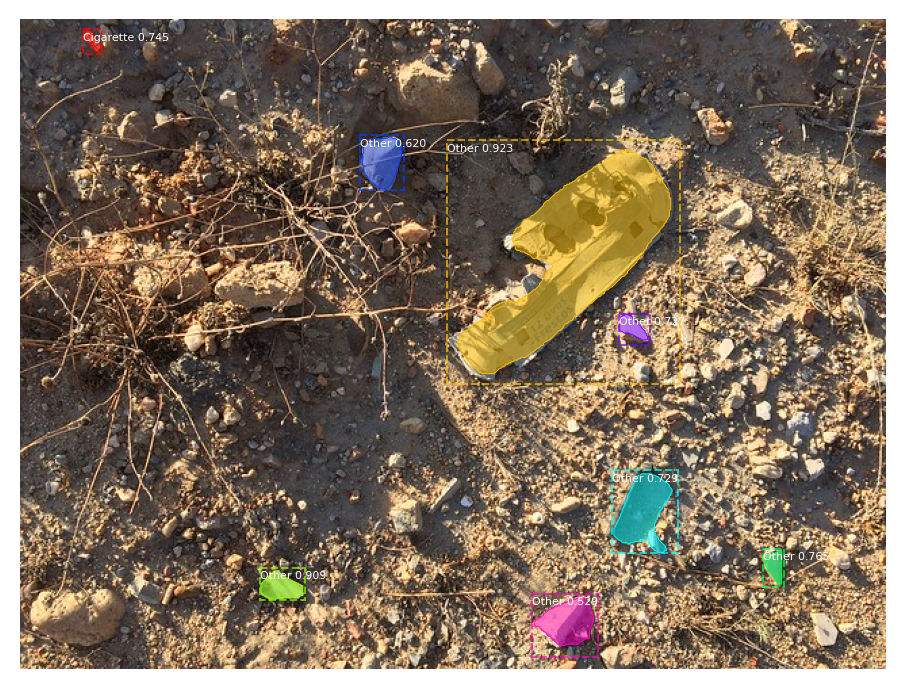

In [6]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())
# load coco model weights
rcnn.load_weights('mask_rcnn_taco_0100.h5','mask_rcnn_taco_0100.h5', by_name=True)
# load photograph
img = load_img('egg.png')
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=0)
# get dictionary for first prediction
r = results[0]
# show photo with bounding boxes, masks, class labels and scores
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], dataset.class_names, r['scores'])

In [5]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
cap.set(3,640) # set Width
cap.set(4,480) # set Height
while(True):
    ret, frame = cap.read()
    frame = cv2.flip(frame, -1) # Flip camera vertically
    
    cv2.imshow('frame', frame)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27: # press 'ESC' to quit
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.1) /tmp/pip-req-build-1syr35c1/opencv/modules/highgui/src/window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'
